<a href="https://colab.research.google.com/github/aln21-ua/TFM-PINNs/blob/main/Comparativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [1]:
# Cálculo numérico
import numpy as np

# Representación y animación
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Visualización de la animación en Colab
from IPython.display import HTML

# Guardar archivos en drive
mountdrive = True
if mountdrive==True:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


# Info

In [2]:
# Longitud de la cuerda
L = 1.0

# Tiempo máximo de simulación
T = 10.0

# Discretización espacial y temporal
Nx = 51  # Número de puntos espaciales
Nt = 61  # Número de puntos temporales
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

A=1

# Cargar datos

In [3]:
TFM_route = "/content/drive/MyDrive/TFM/Implementacion/"
simulation_name = "Ecuacion de onda amortiguada/"

if mountdrive == True:
  TFM_route = "/content/drive/MyDrive/TFM/Implementacion/"
  simulation_name = "Ecuacion de onda amortiguada/"
  u_tx_real = np.load(TFM_route+simulation_name+"u_tx_real.npy")
  u_tx_PINN = np.load(TFM_route+simulation_name+"u_tx_PINN.npy")
  u_tx_PINN_Datos = np.load(TFM_route+simulation_name+"u_tx_PINN_Datos.npy")
  u_tx_PINNsFormer = np.load(TFM_route+simulation_name+"u_tx_PINNsFormer.npy")
  u_tx_PINNsFormer_Datos = np.load(TFM_route+simulation_name+"u_tx_PINNsFormer_Datos.npy")
else:
  u_tx_real = np.load("u_tx_real.npy")
  u_tx_PINN = np.load("u_tx_PINN.npy")
  u_tx_PINN_Datos = np.load("u_tx_PINN_Datos.npy")
  u_tx_PINNsFormer = np.load("u_tx_PINNsFormer.npy")
  u_tx_PINNsFormer_Datos = np.load("u_tx_PINNsFormer_Datos.npy")



# Cálculos de comparativas

## Error absoluto

In [4]:
def AE(u_tx):
  return np.abs(u_tx_real-u_tx)

## Mapa de calor

In [5]:
def ErrorHeatMap(u_tx, title):
  error_abs_tx = AE(u_tx)
  rMAE = np.sum(error_abs_tx) / np.sum(np.abs(u_tx_real))
  rRMSE = np.sqrt(np.sum(error_abs_tx**2) / np.sum(u_tx_real**2))
  print("rMAE = {:.3f}".format(rMAE))
  print("rRMSE = {:.3f}".format(rRMSE))
  plt.figure(figsize=(6, 2))
  plt.imshow(error_abs_tx[:,::-1].T, extent=[np.min(t), np.max(t), np.min(x), np.max(x)], aspect='auto', interpolation='nearest', cmap = "inferno", vmin=0, vmax = max([np.max(error_abs_tx), 0.13]))
  cbar = plt.colorbar(label='AE(x,t)')
  plt.xlabel('t')
  plt.ylabel('x')
  plt.ylim([0,L])
  plt.title('Error Onda Amortiguada: Analítica vs. ' + title)
  plt.show()

## Animación

In [6]:
# Función para ctualizar animación
def ErrorActualizar(frame):
    line.set_ydata(error_abs_tx[frame])
    tiempo_text.set_text(f't: {t[frame]:.2f}')
    return line, tiempo_text

In [7]:
def ErrorAnimation(u_tx, title):
  # Crear figura
  fig, ax = plt.subplots()
  ax.set_xlim(0, L)
  ax.set_ylim(-A*1.1, A*1.1)
  ax.set_xlabel('x')
  ax.set_ylabel('AE(x,t)')
  ax.set_title('Error Onda Amortiguada: Analítica vs. PINN')

  # Imagen inicial
  error_abs_tx = AE(u_tx)
  line, = ax.plot(x, error_abs_tx[0])
  tiempo_text = ax.text(0.95, 0.95, '', transform=ax.transAxes, ha='right', va='top', fontsize=12)

  # Actualizar
  ani = animation.FuncAnimation(fig, ErrorActualizar, frames=Nt, interval=50, blit=True)

  # Mostrar la animación en Google Colab
  plt.close("all")
  HTML(ani.to_jshtml())

# Análisis de resultados

## NN

In [8]:
#ErrorHeatMap(u_tx_NN, "NN")

## Transformer

In [9]:
#ErrorHeatMap(u_tx_Transformer, "Transformer")

## PINN

rMAE = 0.333
rRMSE = 0.225


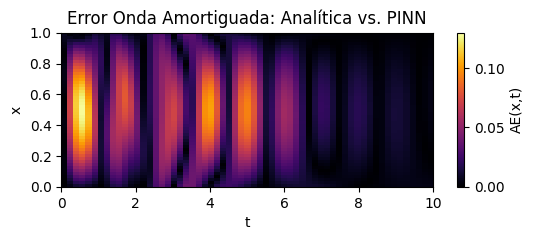

In [10]:
ErrorHeatMap(u_tx_PINN, "PINN")

## PINN+Datos

rMAE = 0.224
rRMSE = 0.165


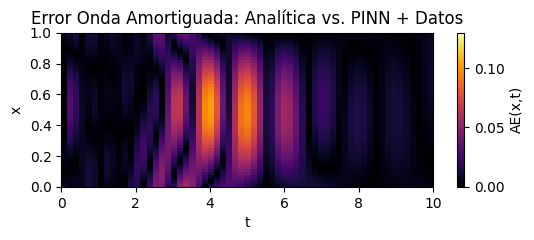

In [11]:
ErrorHeatMap(u_tx_PINN_Datos, "PINN + Datos")

## PINNsFormer

rMAE = 0.187
rRMSE = 0.151


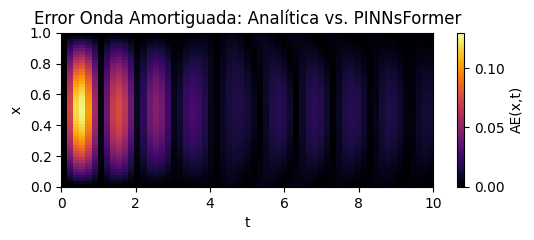

In [12]:
ErrorHeatMap(u_tx_PINNsFormer, "PINNsFormer")

## PINNsFormer + Datos

rMAE = 0.188
rRMSE = 0.154


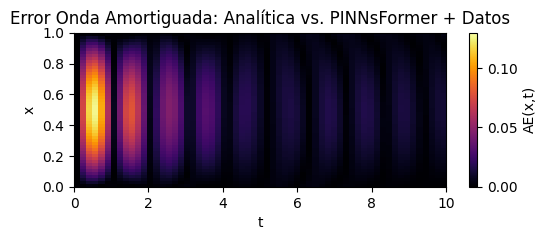

In [13]:
ErrorHeatMap(u_tx_PINNsFormer_Datos, "PINNsFormer + Datos")

# Animación simultánea

In [27]:
def actualizar(frame):
    for i, ax in enumerate(axs.flatten()):
        lines_real[i].set_ydata(u_tx_real[frame])
        lines[i].set_ydata(data_sets[i][frame])
        tiempo_texts[i].set_text(f't: {t[frame]:.2f}')

    return lines_real + lines + tiempo_texts

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)

titles = ["Analítica vs NN", "Analítica vs Transformer", "Analítica vs PINN", "Analítica vs PINN + Datos", "Analítica vs PINNsFormer", "Analítica vs PINNsFormer + Datos"]
data_sets = [u_tx_PINN, u_tx_PINNsFormer, u_tx_PINN, u_tx_PINN_Datos, u_tx_PINNsFormer, u_tx_PINNsFormer_Datos]

titles = ["Analítica vs PINN", "Analítica vs PINN + Datos", "Analítica vs PINNsFormer", "Analítica vs PINNsFormer + Datos"]
data_sets = [u_tx_PINN, u_tx_PINN_Datos, u_tx_PINNsFormer, u_tx_PINNsFormer_Datos]


lines_real = []
lines = []
tiempo_texts = []

# Configurar cada subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_xlim(0, L)
    ax.set_ylim(-A*1.1, A*1.1)
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.set_title(titles[i])

    # Dibujar las líneas iniciales
    line_real, = ax.plot(x, u_tx_real[0], label="Analítica")
    lines_real.append(line_real)

    line_compare, = ax.plot(x, data_sets[i][0], label=titles[i].split(" vs ")[1])
    lines.append(line_compare)

    tiempo_text = ax.text(0.95, 0.95, '', transform=ax.transAxes, ha='right', va='top', fontsize=12)
    tiempo_texts.append(tiempo_text)
    ax.legend(loc="lower right")

# Crear la animación
ani = animation.FuncAnimation(fig, actualizar, frames=Nt, interval=50, blit=True)

# Mostrar la animación en Google Colab
plt.close("all")
HTML(ani.to_jshtml())


In [26]:
ani.save('comparativa.mp4')